In [8]:
#import all required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [9]:
#load login data
from google.colab import files
login_file = files.upload()

Saving login.csv to login (1).csv


In [10]:
#get login info and set api credentials
login = pd.read_csv("login.csv")
consumerKey = login['key'][0]
consumerSecret = login['key'][1]
accessToken = login['key'][2]
accessTokenSecret = login['key'][3]

In [11]:
#create authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#set access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#create api object by passing authentication object
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [32]:
#fetch 200 latest tweets from a twitter user
posts = api.user_timeline(screen_name="BillGates", count=200, lang="en", tweet_mode="extended")

# print 5 recent tweets
i=1
for tweet in posts[0:5]:
  print(str(i)+") " + tweet.full_text + "\n")
  i=i+1

1) For the last 25 years, Dr. Firdausi Qadri, an immunologist and infectious disease researcher in Bangladesh, has been working to protect entire communities from cholera epidemics. https://t.co/F2pQiIYqry

2) I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. https://t.co/ZadPiUS73z

3) The only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. By making sure poor countries are equipped to stop this disease, wealthy countries will help themselves and bring this crisis to an end sooner. https://t.co/CzFHuwdPcS

4) Understanding this concept can help us measure our progress toward eliminating carbon emissions and serve as a guide to action. https://t.co/xA0rjh8xBk

5) Developing and manufacturing vaccines won’t end the pandemic quickly unless we also deliver them equitably. Here is why it’s critical that vaccines are distributed in proportion to the global population: https://t.co/XFT

In [34]:
#create dataframe with Tweets column
data = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])
data

,Tweets
0,"For the last 25 years, Dr. Firdausi Qadri, an ..."
1,I’m excited to see this kind of innovation. De...
2,The only way to eliminate the threat of COVID-...
3,Understanding this concept can help us measure...
4,Developing and manufacturing vaccines won’t en...
...,...
195,We have cut the number of child deaths in half...
196,Buildings are one of the five areas where we n...
197,"A lot of work remains, but it’s exciting to se..."
198,I always like to try out a new TV show or two ...


In [35]:
#clean/preprocess tweets

def cleanText(text):
  text = re.sub('@[A-z0-9]+','',text) #remove @mentions
  text = re.sub('#','',text) #remove '#' symbol
  text = re.sub('RT[\s]','',text) #remove retweet mentions
  text = re.sub('https?:\/\/\S+','',text) #remove hyperlink
  text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',text) #remove punctuations

  return text

#apply cleanText function to Tweets column and display cleaned tweets
data['Tweets'] = data['Tweets'].apply(cleanText)

data

,Tweets
0,For the last 25 years Dr Firdausi Qadri an imm...
1,I’m excited to see this kind of innovation Det...
2,The only way to eliminate the threat of COVID1...
3,Understanding this concept can help us measure...
4,Developing and manufacturing vaccines won’t en...
...,...
195,We have cut the number of child deaths in half...
196,Buildings are one of the five areas where we n...
197,A lot of work remains but it’s exciting to see...
198,I always like to try out a new TV show or two ...


In [36]:
#download and display stopwords of english language
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
#remove stopwords from tweets
def removeStopwords(text):
  text_words = [ word for word in text.split() if word.lower() not in stopwords.words('english')]
  text = ' '.join(text_words)
  return text;

#apply removeStopwords function to Tweets column
data['Tweets'] = data['Tweets'].apply(removeStopwords)

data

,Tweets
0,last 25 years Dr Firdausi Qadri immunologist i...
1,I’m excited see kind innovation Detecting pred...
2,way eliminate threat COVID19 somewhere elimina...
3,Understanding concept help us measure progress...
4,Developing manufacturing vaccines won’t end pa...
...,...
195,cut number child deaths half last 20 years New...
196,Buildings one five areas need lot innovation w...
197,lot work remains it’s exciting see positive da...
198,always like try new TV show two I’m road watch...


In [38]:
#get subjectivity and polarity of tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create 2 new columns and display new dataframe
data['Subjectivity']=data['Tweets'].apply(getSubjectivity)
data['Polarity']=data['Tweets'].apply(getPolarity)

data

,Tweets,Subjectivity,Polarity
0,last 25 years Dr Firdausi Qadri immunologist i...,0.345833,0.000000
1,I’m excited see kind innovation Detecting pred...,0.737500,0.243750
2,way eliminate threat COVID19 somewhere elimina...,0.829630,0.200000
3,Understanding concept help us measure progress...,0.100000,0.100000
4,Developing manufacturing vaccines won’t end pa...,0.433333,0.111111
...,...,...,...
195,cut number child deaths half last 20 years New...,0.213636,-0.049242
196,Buildings one five areas need lot innovation w...,0.833333,0.166667
197,lot work remains it’s exciting see positive da...,0.672727,0.263636
198,always like try new TV show two I’m road watch...,0.227273,0.068182


(-0.5, 499.5, 299.5, -0.5)

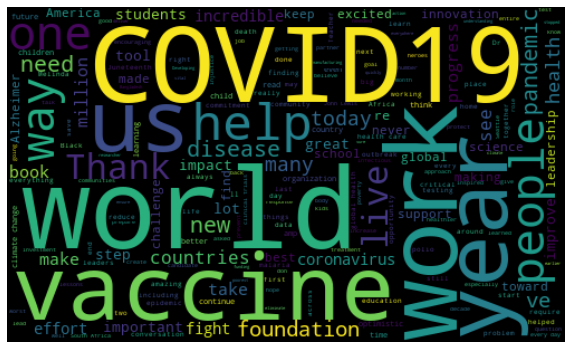

In [39]:
#plot wordcloud
words = ' '.join( [ tweet for tweet in data['Tweets'] ])
wc = WordCloud(width=500,height=300,random_state=21,max_font_size=100).generate(words)

plt.figure(figsize = (10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

In [40]:
#compute positive, neutral or negative label
def getLabel(label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"
  else:
    return "Positive"

#create new column for label and display new dataframe
data['Label'] = data['Polarity'].apply(getLabel)

data

,Tweets,Subjectivity,Polarity,Label
0,last 25 years Dr Firdausi Qadri immunologist i...,0.345833,0.000000,Neutral
1,I’m excited see kind innovation Detecting pred...,0.737500,0.243750,Positive
2,way eliminate threat COVID19 somewhere elimina...,0.829630,0.200000,Positive
3,Understanding concept help us measure progress...,0.100000,0.100000,Positive
4,Developing manufacturing vaccines won’t end pa...,0.433333,0.111111,Positive
...,...,...,...,...
195,cut number child deaths half last 20 years New...,0.213636,-0.049242,Negative
196,Buildings one five areas need lot innovation w...,0.833333,0.166667,Positive
197,lot work remains it’s exciting see positive da...,0.672727,0.263636,Positive
198,always like try new TV show two I’m road watch...,0.227273,0.068182,Positive


In [41]:
#print all tweets with positive label
j = 1
sortedData = data.sort_values(by="Polarity")
for i in range(0,sortedData.shape[0]):
  if sortedData['Label'][i] == "Positive":
    print(str(j) + ") "+sortedData['Tweets'][i])
    j=j+1

1) I’m excited see kind innovation Detecting predicting outbreaks earlier critical preventing epidemics
2) way eliminate threat COVID19 somewhere eliminate everywhere making sure poor countries equipped stop disease wealthy countries help bring crisis end sooner
3) Understanding concept help us measure progress toward eliminating carbon emissions serve guide action
4) Developing manufacturing vaccines won’t end pandemic quickly unless also deliver equitably it’s critical vaccines distributed proportion global population
5) Great see UK commit vital funding ensure COVID19 vaccines available world’s poorest people PM plan improve way prepare future crises like
6) 20 years stunning advances toward global goals improve health reduce poverty COVID19 pandemic stopped progress tracks foundation’s Goalkeepers report survey damage discuss start reversing
7) Dr John Nkengasong true Goalkeeper leadership help ensure Africa tools needs fight COVID19
8) Justice Ginsburg trailblazer devoted entire c

In [42]:
#print all tweets with negative label
j = 1
sortedData = data.sort_values(by="Polarity")
for i in range(0,sortedData.shape[0]):
  if sortedData['Label'][i] == "Negative":
    print(str(j) + ") "+sortedData['Tweets'][i])
    j=j+1

1) prevent worst effects climate change need innovation across sectors—especially hardest decarbonize sectors—to get us viable path netzero emissions
2) longstanding barriers made worse COVID19 hundreds thousands students promise may never start college would disastrous young people country Here’s we’re help
3) learn lessons COVID19 approach climate change informed consequences inaction prepared save lives prevent worst possible outcome
4) hero playing critical role Kenya’s preparations tackle COVID19 scaling medical oxygen supplies needed keep critically ill patients alive
5) “It’s clarity language VALUE black life America distinguishes Juneteenth emancipation…
6) “Only feigning blindness fail see body work work body done Everything is…
7) Juneteenth recognizes amp celebrates Black people’s freedom end slavery US 19 Jun 1865 Union Army Genera…
8) 1 Opal Lee force behind movement make Juneteenth national holiday Also known Freedom Day it…
9) committed listening learning systemic racism

In [43]:
#print all tweets with neutral label
j = 1
sortedData = data.sort_values(by="Polarity")
for i in range(0,sortedData.shape[0]):
  if sortedData['Label'][i] == "Neutral":
    print(str(j) + ") "+sortedData['Tweets'][i])
    j=j+1

1) last 25 years Dr Firdausi Qadri immunologist infectious disease researcher Bangladesh working protect entire communities cholera epidemics
2) COVID19 malaria COVID19 struck disrupted entire global healt…
3) Deaths malaria cut half since year 2000 Increased bed net use one main reasons WorldMosquitoDay
4) Vaccines prevent millions deaths every year harnessing body’s immune system create defences future infection…
5) community health worker Kenya’s Homa Bay County Evaline helped community dramatically reduce number of…
6) Move aside still world’s deadliest killer
7) commitment critical “Additional manufacturing capacity begin producing doses every country the…
8) Last month 1 billion students affected COVID19 school closures Even pandemic world wa…
9) Bill Foege instrumental effort eradicate smallpox personal hero mine outlines lessons learned campaign apply fight COVID19
10) recent webinar called communityled responses coronavirus types engagements ha…
11) final words John Lewis chal

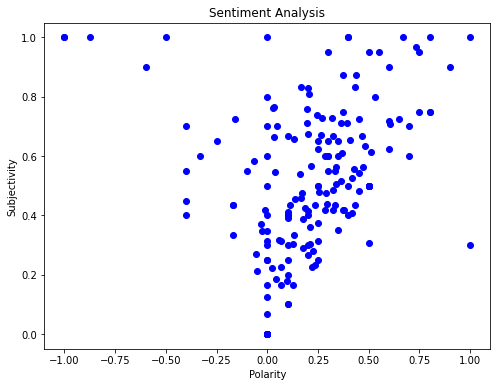

In [44]:
#plot polarity and subjectivity using scatterplot
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color="blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [45]:
#get percentage of positive tweets
ptweets = data[data['Label']=="Positive"]
ptweets = ptweets['Tweets']
print("Percentage of Positive Tweets:")
print(round(ptweets.shape[0]/data.shape[0] *100, 1))

Percentage of Positive Tweets:
67.5


In [46]:
#get percentage of negative tweets
ntweets = data[data['Label']=="Negative"]
ntweets = ntweets['Tweets']
print("Percentage of Negative Tweets:")
print(round(ntweets.shape[0]/data.shape[0] *100, 1))

Percentage of Negative Tweets:
11.0


In [47]:
#get percentage of neutral tweets
tweets = data[data['Label']=="Neutral"]
tweets = tweets['Tweets']
print("Percentage of Neutral Tweets:")
print(round(tweets.shape[0]/data.shape[0] *100, 1))

Percentage of Neutral Tweets:
21.5


Positive    135
Neutral      43
Negative     22
Name: Label, dtype: int64


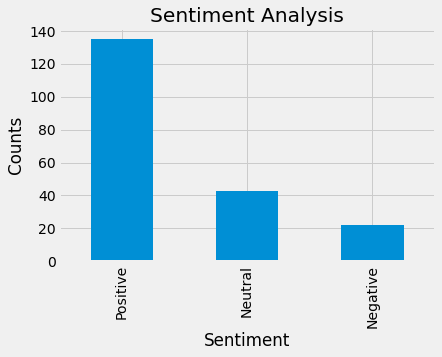

In [51]:
# diaplay counts of each label
print(data['Label'].value_counts())

#plot and visualize counts
plt.style.use('fivethirtyeight')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
data['Label'].value_counts().plot(kind='bar')
plt.show()